# Part 1: Small world networks

#### Reading: Chapter 3, emphasis on 3.8 and 3.9.

#### Exercises:

Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.

* What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
    - In random networks there might be an extremely connected node and a node that is left behind with just a few connections. In real-world networks people deviation from the least and most connected people is notably smaller than in a random network. $σ_k = ‹k›^{1/2}.$

* List the four regimes that characterize random networks as a function of ⟨k⟩
    - Subcritical, $0 < <k> < 1$
    - Critical, $<k> = 1$
    - Supercritical, $ <k> > 1$
    - Connected, $ <k> > ln(N)$

* According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?
    - Random network model does not capture the clustering of real networks. Real networks have a much higher clustering coefficient than a random network of similar N and L.
    
The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using networkx, writing loops, and plotting nice figures.

#### Exercises: WS edition.

First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p=0, 0.1, and 1$.
- Calculate the average shortest path length ⟨d⟩ for each one. Describe what happens to the network when p=1.

In [1]:
import networkx as nx

In [2]:
WS_0 = nx.watts_strogatz_graph(500, 4, 0)
WS_1 = nx.watts_strogatz_graph(500, 4, 0.1)
WS_2 = nx.watts_strogatz_graph(500, 4, 1)

In [11]:
d_0 = nx.average_shortest_path_length(WS_0)
d_1 = nx.average_shortest_path_length(WS_1)
d_2 = nx.average_shortest_path_length(WS_2)
print(d_0)
print(d_1)
print(d_2)
import numpy
numpy.log(500)/500

62.875751503006015
7.703046092184369
4.737923847695391


0.012429216196844383

The network becomes connected because $p > lnN/N$
- Play around with p.
- What's the value of p for which the average shortest path length gets close to the fully randomized network (i.e. when p=1).

In [44]:
WS_r = nx.watts_strogatz_graph(500, 4, 0.015)
d_r = nx.average_shortest_path_length(WS_r)
print(d_r)
ER = nx.erdos_renyi_graph(500, 0.015)
print(nx.average_shortest_path_length(ER))

21.229290581162324
3.317875751503006


- Let's investigate this behavior in detail. Generate 50 networks with N=500
    , ⟨k⟩=4
    , for each of p={0,0.01,0.03,0.05,0.1,0.2}.
    Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [76]:
N = 500
k_avg = 4
ps = [0, .01, .03, .05, .1, .2]
fiftyNW = list()
for p in ps:
    for i in range (0, 50):
        n = nx.watts_strogatz_graph(N, k_avg, p)
        fiftyNW.append((p, n))
#d_avg

#std_dev over the 50 nw

In [77]:
d_0 = list()
d_1 = list()
d_2 = list()
d_3 = list()
d_4 = list()
d_5 = list()

for p, n in fiftyNW:
    if p == 0:
        d_0.append(nx.average_shortest_path_length(n))
    if p == .01:
        d_1.append(nx.average_shortest_path_length(n))
    if p == .03:
        d_2.append(nx.average_shortest_path_length(n))
    if p == .05:
        d_3.append(nx.average_shortest_path_length(n))
    if p == .1:
        d_4.append(nx.average_shortest_path_length(n))
    if p == .2:
        d_5.append(nx.average_shortest_path_length(n))

In [78]:
import numpy

In [91]:
avg_d = list()
avg_d.append(numpy.average(d_0))
avg_d.append(numpy.average(d_1))
avg_d.append(numpy.average(d_2))
avg_d.append(numpy.average(d_3))
avg_d.append(numpy.average(d_4))
avg_d.append(numpy.average(d_5))
print(avg_d)
import matplotlib.pyplot

[62.87575150300602, 23.478988216432864, 13.009721843687375, 10.233246973947894, 7.685434228456914, 6.1106597194388765]


Text(0,0.5,'average <d>')

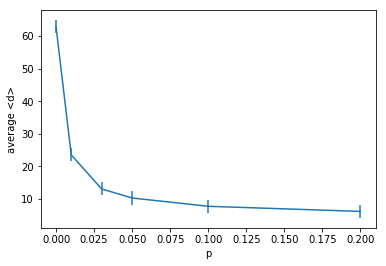

In [111]:
binned = numpy.histogram(avg_d,bins=sorted(ps))
matplotlib.pyplot.errorbar(ps, avg_d, yerr=2)
matplotlib.pyplot.xlabel('p')
matplotlib.pyplot.ylabel('average <d>')